In [12]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

from amftrack.pipeline.launching.run_super import (
    run_launcher,
    directory_scratch,
    directory_project,
    directory_project,
    run_parallel_stitch,
    run_parallel_transfer,
)
import os
from amftrack.util.sys import (
    get_dates_datetime,
    get_dirname,
    temp_path,
    get_data_info,
    update_plate_info,
    update_analysis_info,
    get_analysis_info,
    get_current_folders,
    get_folders_by_plate_id,
)

from time import time_ns
from amftrack.util.dbx import upload_folders, load_dbx, download, get_dropbox_folders
from datetime import datetime
from amftrack.pipeline.launching.run_super import (
    run_parallel,
    directory_scratch,
    directory_project,
    run_parallel_stitch,
)
from amftrack.util.dbx import read_saved_dropbox_state, get_dropbox_folders
import sys
import os

from amftrack.util.sys import get_dirname, temp_path
import pandas as pd
import ast
from scipy import sparse
import scipy.io as sio
import cv2
import imageio.v2 as imageio
import numpy as np
import scipy.sparse
import os
from time import time
from amftrack.pipeline.functions.image_processing.extract_skel import (
    extract_skel_new_prince,
    run_back_sub,
    bowler_hat,
)

from amftrack.util.sys import get_dates_datetime, get_dirname
import shutil
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
directory_targ = os.path.join(directory_scratch, "stitch_temp2") + "/"
update_plate_info(directory_targ, local=True)
all_folders = get_current_folders(directory_targ, local=True)

analysed:   0%|          | 0/295 [00:00<?, ?it/s]

In [8]:
folders = all_folders.loc[all_folders["Plate"] == "24"]
directory = directory_targ

In [10]:
directory_name

'20220502_1317_Plate19'

In [9]:
i = 40
folder_list = list(folders["folder"])
folder_list.sort()
directory_name = folder_list[i]
print(directory_name)
run_back_sub(directory, directory_name)
path_snap = os.path.join(directory, directory_name)
path_tile = os.path.join(path_snap, "Img/TileConfiguration.txt.registered")
try:
    tileconfig = pd.read_table(
        path_tile,
        sep=";",
        skiprows=4,
        header=None,
        converters={2: ast.literal_eval},
        skipinitialspace=True,
    )
except:
    print("error_name")
    path_tile = os.path.join(path_snap, "Img/TileConfiguration.registered.txt")
    tileconfig = pd.read_table(
        path_tile,
        sep=";",
        skiprows=4,
        header=None,
        converters={2: ast.literal_eval},
        skipinitialspace=True,
    )
dirName = path_snap + "/Analysis"
try:
    os.mkdir(path_snap + "/Analysis")
    print("Directory ", dirName, " Created ")
except FileExistsError:
    print("Directory ", dirName, " already exists")
t = time()
xs = [c[0] for c in tileconfig[2]]
ys = [c[1] for c in tileconfig[2]]
name = tileconfig[0][0]
imname = "/Img3/" + name.split("/")[-1]
im = imageio.imread(directory + directory_name + imname)
dim = (
    int(np.max(ys) - np.min(ys)) + max(im.shape),
    int(np.max(xs) - np.min(xs)) + max(im.shape),
)
ims = []
skel = np.zeros(dim, dtype=np.uint8)
params = [30]

20220502_1317_Plate19


Java HotSpot(TM) 64-Bit Server VM warning: ignoring option PermSize=128m; support was removed in 8.0
Java HotSpot(TM) 64-Bit Server VM warning: Using incremental CMS is deprecated and will likely be removed in a future release


Directory  /scratch-shared/amftrack/stitch_temp2/20220502_1317_Plate19/Analysis  already exists


/projects/0/einf914/data//20220502_1317_Plate19//Img2/Img_r08_c05.tif


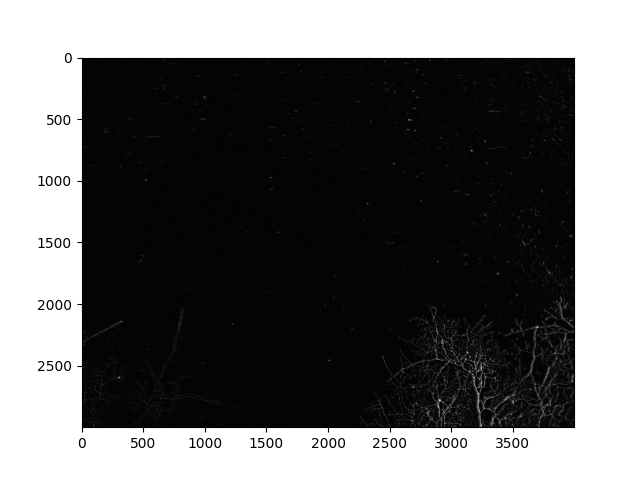

In [59]:
j = 83

for index, name in enumerate(tileconfig[0][j : j + 1]):
    # for index, name in enumerate(list_debug):
    print(name)
    imname = "/Img3/" + name.split("/")[-1]
    im = imageio.imread(directory + directory_name + imname)
    imname2 = "/Img/" + name.split("/")[-1]
    im2 = imageio.imread(directory + directory_name + imname2)
    bowled2 = bowler_hat(-im2, 32, params)
    im[bowled2 <= 0.09] = np.maximum(im[bowled2 <= 0.09], 250)
    fig, ax = plt.subplots()
    ax.imshow(im, cmap="Greys")
    # shape = im.shape
    # print("segmenting")
    # segmented = extract_skel_new_prince(im, [hyph_width], perc_low, perc_high)
    # # low = np.percentile(-im+255, perc_low)
    # # high = np.percentile(-im+255, perc_high)
    # # segmented = filters.apply_hysteresis_threshold(-im+255, low, high)
    # boundaries = int(tileconfig[2][index][0] - np.min(xs)), int(
    #     tileconfig[2][index][1] - np.min(ys)
    # )
    # skel[
    #     boundaries[1] : boundaries[1] + shape[0],
    #     boundaries[0] : boundaries[0] + shape[1],
    # ] += segmented

In [60]:
from amftrack.pipeline.functions.image_processing.extract_skel import *

hyph_width = 20
perc_low = 80
perc_high = 99.5
bowled = bowler_hat(-im.astype(np.uint8), 32, params)
filename = time_ns()
place_save = temp_path
to_smooth = np.minimum(bowled * 255, 255 - im)
# to_smooth = 255-im
imtransformed_path = f"{place_save}/{filename}.tif"
imageio.imsave(imtransformed_path, to_smooth.astype(np.uint8))
path_anis = pastis_path
args = [0.1, 7, 0.9, 10, 50]
command = [path_anis, imtransformed_path] + args
command = [str(elem) for elem in command]
print("anis filtering")
process = subprocess.run(command, cwd=place_save, stdout=subprocess.DEVNULL)
foldname = f"{filename}_ani-K{int(args[0]*10)}s{args[1]}g{int(args[2]*10)}itD{args[3]}"
imname = foldname + f"/{foldname}it{args[4]}.tif"
path_modif = place_save + "/" + imname
try:
    im3 = imageio.imread(path_modif)
except:
    im3 = to_smooth.astype(np.uint8)
print("image_reading")
# shutil.rmtree(os.path.join(place_save, foldname))
low = max(10, np.percentile(im3, perc_low))
high = max(90, np.percentile(im3, perc_high))
transformed = im3
hyst = filters.apply_hysteresis_threshold(transformed, low, high)
dilated = remove_holes(hyst)
dilated = dilated.astype(np.uint8)
connected = remove_component(dilated)

anis filtering
image_reading


In [68]:
np.percentile(im3, 90)

3.0

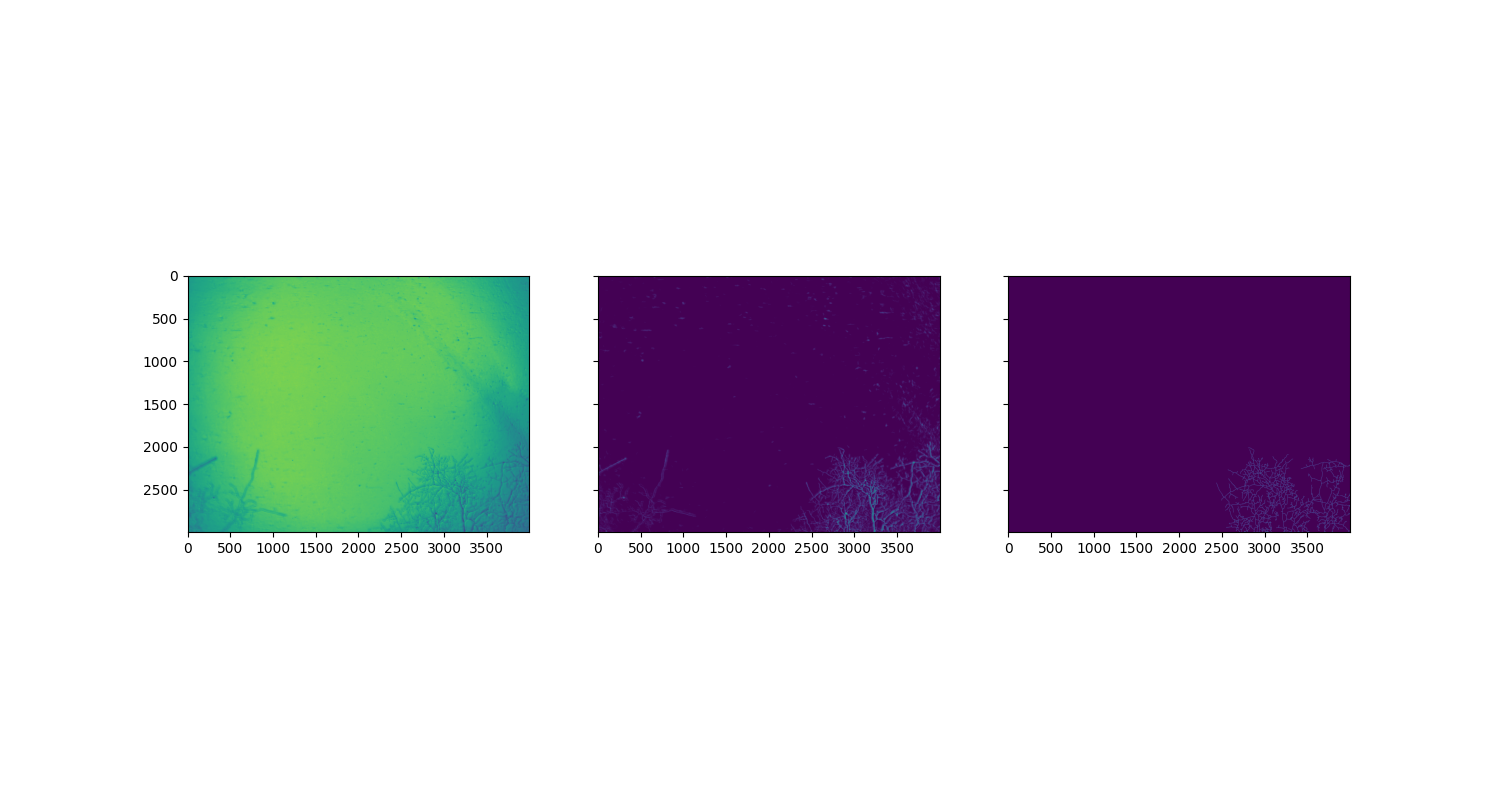

In [66]:
fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(15, 8))
ax[0].imshow(im2)
ax[1].imshow(im3)
ax[2].imshow(skeletonized)

In [65]:
skeletonized = cv2.ximgproc.thinning(np.array(255 * (connected > 0), dtype=np.uint8))

In [58]:
import sys

from scipy import sparse
from pymatreader import read_mat

from amftrack.util.sys import temp_path
from amftrack.pipeline.functions.image_processing.extract_graph import (
    from_sparse_to_graph,
    generate_nx_graph,
    clean_degree_4,
)
from amftrack.pipeline.functions.image_processing.node_id import remove_spurs
import scipy.sparse
import pickle
import pandas as pd

skeleton = scipy.sparse.dok_matrix(skeletonized)
nx_graph, pos = generate_nx_graph(from_sparse_to_graph(skeleton))
# Optional, to remove spurs
nx_graph, pos = remove_spurs(nx_graph, pos)

nx_graph_pruned = clean_degree_4(nx_graph, pos)[0]

cleaning, number of nodes before 3327
number of unsolved cases 513
number of unsolved cases 303
number of unsolved cases 247
number of unsolved cases 235
number of unsolved cases 224
number of unsolved cases 219
number of unsolved cases 219
number of unsolved cases 218
end cleaning, number of nodes after 2763
